In [7]:
import pandas as pd
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import matplotlib.mlab as mlab
from scipy.stats import norm
#import necessary libraries

In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
filepath = '/content/drive/MyDrive/Colab Notebooks/dataset_FLD.csv'

ModuleNotFoundError: No module named 'google'

In [4]:
df=pd.read_csv(filepath)  #read and print the dataset given
df.columns=["A","B","C","Out"]
print(data1)

NameError: name 'filepath' is not defined

In [44]:
mean1 = data1.groupby("Output").mean()   #classifying into two classes and finding the mean
mean1

,X,Y,Z
Output,,,
0,0.115871,0.105995,-1.004978
1,0.223103,0.002559,1.010271


In [45]:
mean_vector = mean1.iloc[0]-mean1.iloc[1]
mean_vector

X   -0.107232
Y    0.103436
Z   -2.015249
dtype: float64

In [46]:
points = data1.groupby('Output')
positive_points = points.get_group(1)  #positive as Output 1
negative_points = points.get_group(0)  #negative as Output 0
del positive_points['Output']
del negative_points['Output']
pos_diff = positive_points - mean1.iloc[1]  #(xn-M1)  M1 is mean vector for all points of Output 1
neg_diff = negative_points - mean1.iloc[0]  #(xn-M2)  M2 is mean vector for all points of Output 0
pos_diff = pos_diff.values
neg_diff = neg_diff.values
N1 = len(positive_points)
N2 = len(negative_points)


In [47]:
sum_pos=np.zeros((3,3))   #to find Sw matrix -> within covariance matrix
sum_neg=np.zeros((3,3))

for i in range(len(pos_diff)):
  sum_pos= np.dot(pos_diff[i].reshape(3,1),pos_diff[i].reshape(1,3)) + sum_pos
for i in range(len(neg_diff)):
  sum_neg= np.dot(neg_diff[i].reshape(3,1),neg_diff[i].reshape(1,3)) + sum_neg

#summation of (xn-M1)^2 = sum_pos
#summation of (xn-M2)^2 = sum_neg

covariance_matrix = sum_pos/N1 + sum_neg/N2  
covariance_matrix

array([[18.05002244, -0.21543087,  0.12489504],
       [-0.21543087,  1.97092689,  0.0255759 ],
       [ 0.12489504,  0.0255759 ,  0.17940683]])

In [48]:
covariance_inverse = np.linalg.inv(covariance_matrix)   #finding Sw inverse
covariance_inverse

array([[ 0.05575558,  0.00661024, -0.03975689],
       [ 0.00661024,  0.50909952, -0.07717801],
       [-0.03975689, -0.07717801,  5.61260315]])

In [49]:
mean_vector  # M1-M2

X   -0.107232
Y    0.103436
Z   -2.015249
dtype: float64

In [50]:
wt_vector = np.dot(covariance_inverse,mean_vector)/(la.norm(covariance_inverse)*la.norm(mean_vector))

wt_vector   # w = (inverse of Sw)(M1-M2)

array([ 0.0065685 ,  0.01821387, -0.99324178])

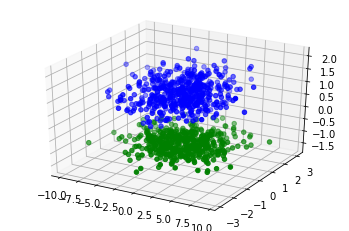

In [51]:
fig=plt.figure() 
ax = plt.axes(projection ='3d') 
ax.scatter(positive_points.iloc[:,0],positive_points.iloc[:,1],positive_points.iloc[:,2],color = 'b')
ax.scatter(negative_points.iloc[:,0],negative_points.iloc[:,1],negative_points.iloc[:,2],color = 'g')
plt.show()


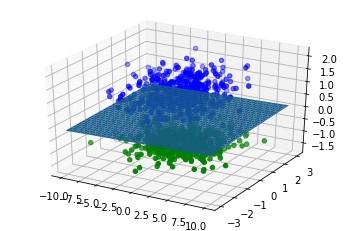

In [52]:
fig=plt.figure() 
ax = plt.axes(projection ='3d') 
ax.scatter(positive_points.iloc[:,0],positive_points.iloc[:,1],positive_points.iloc[:,2],color = 'b')
ax.scatter(negative_points.iloc[:,0],negative_points.iloc[:,1],negative_points.iloc[:,2],color = 'g')
x = np.linspace(-10,10,100)
y = np.linspace(-3,3,30)

X,Y = np.meshgrid(x,y)
Z=(0.0065685*X + 0.01821387*Y)/(0.99324178)
#Z=(-0.00394262*X-0.07930584*Y)/(0.99684254)

ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.show()

In [53]:
positive_points = positive_points.values
negative_points = negative_points.values
projected_pos_pts = np.dot(positive_points,wt_vector)  #projecting points belonging to class1 on w vector
projected_neg_pts = np.dot(negative_points,wt_vector)  #projecting points belonging to class0 on w vector

In [54]:
projected_pos_pts.shape
projected_neg_pts.shape

(499,)

In [55]:
arrp = np.zeros((len(projected_pos_pts),1))
arrn = np.zeros((len(projected_neg_pts)))

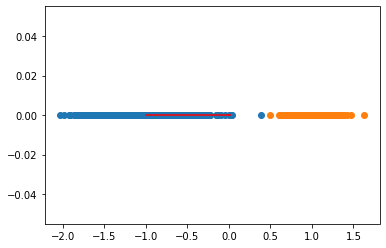

In [56]:
plt.scatter(projected_pos_pts,arrp)
plt.scatter(projected_neg_pts,arrn)
plt.plot(wt_vector,[0,0,0],'r')
plt.show()

In [57]:
final_positive_mean = projected_pos_pts.mean()
final_negative_mean = projected_neg_pts.mean()
final_positive_std = projected_pos_pts.std()
final_negative_std = projected_neg_pts.std()

In [58]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = solve(final_positive_mean,final_negative_mean,final_positive_std,final_negative_std)
result = result[1]

result #discriminant point to separate both positive and negative classes

0.38624719619110504

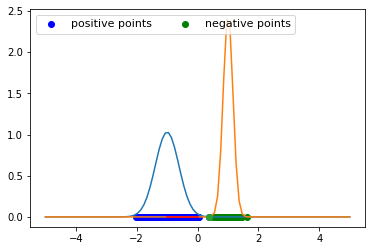

In [62]:
x = np.linspace(-5, 5, 100)
ptemp = np.zeros((len(projected_pos_pts),1))
ntemp = np.zeros((len(projected_neg_pts),1))
plt.plot(x, norm.pdf(x, final_positive_mean, final_positive_std))
plt.plot(x,norm.pdf(x,final_negative_mean,final_negative_std))
plt.plot(result,norm.pdf(result,final_positive_mean,final_positive_std),'o')
a=plt.scatter(projected_pos_pts,ptemp,color = 'b')
b=plt.scatter(projected_neg_pts,ntemp,color = 'g')
plt.plot(wt_vector,[0,0,0],'r')
eleven = 11
plt.legend((a,b),
           ('positive points','negative points'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=eleven)
plt.show()

In [63]:
pred_pos_dataset = pd.DataFrame(projected_pos_pts)
pred_neg_dataset = pd.DataFrame(projected_neg_pts)

pred_pos_dataset

,0
0,-0.561364
1,-0.547115
2,-0.431580
3,-1.386669
4,-1.164026
...,...
495,-1.143983
496,-0.521713
497,-1.028864
498,-0.888840


In [64]:

pred_pos_dataset = pred_pos_dataset.values
pred_neg_dataset = pred_neg_dataset.values

# ptemp is an array of zeros which will represent the predicted class for the positive pts.So, appended to the predicted positive dataset
ptemp = np.zeros((len(pred_pos_dataset),1))
ntemp = np.zeros((len(pred_neg_dataset),1))
pred_pos = np.append(pred_pos_dataset, ptemp, axis=1)
pred_neg = np.append(pred_neg_dataset, ntemp, axis=1)

In [19]:
tp=0 #true positive
tn=0 #true negative
fp=0 #false positive
fn=0 #false negative
i = 0
while(i<range(len(pred_pos_dataset))):
  if pred_pos[i,0]>=result:
    pred_pos[i,1] = 0
    fn+=1
  else:
    pred_pos[i,1] = 1
    tp+=1
i =0
while(i<range(len(pred_neg_dataset))):
  if pred_neg[i,0]>=result:
    pred_neg[i,1] = 0
    tn+=1
  else:
    pred_neg[i,1] = 1
    fp+=1

NameError: name 'pred_pos_dataset' is not defined

In [22]:
tp_aa = (tp+tn)/(tp+tn+fp+fn)
test_accuracy = tp_aa
test_accuracy

ZeroDivisionError: division by zero